In [1]:
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data_ = pd.read_csv('/Users/Aravindh/Downloads/Copper_Set.xlsx - Result 1 (1).csv', low_memory=False)
     

In [5]:
data = data_.copy()

In [6]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [7]:
print(data.shape)
data.dtypes

(181673, 14)


id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
#converting to appropriate data_types and fixing duplicates and null values
#data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
#data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

In [10]:
data.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [11]:
duplicates = data[data.duplicated()]
duplicates.shape[0]  #there  is no duplicates in the dataset

0

In [12]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [13]:
#we'll fill mat_ref alone with mode and drop the rest null values since % is higher in case of mat_ref
data['material_ref'].fillna(data['material_ref'].mode()[0], inplace=True)
data = data.dropna()

In [14]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
data.shape

(181635, 14)

In [16]:
data = data.drop(['id'],axis =1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181635 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181635 non-null  float64
 1   quantity tons  181635 non-null  float64
 2   customer       181635 non-null  float64
 3   country        181635 non-null  float64
 4   status         181635 non-null  object 
 5   item type      181635 non-null  object 
 6   application    181635 non-null  float64
 7   thickness      181635 non-null  float64
 8   width          181635 non-null  float64
 9   material_ref   181635 non-null  object 
 10  product_ref    181635 non-null  int64  
 11  delivery date  181635 non-null  float64
 12  selling_price  181635 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 19.4+ MB


In [18]:
#removing the neagtive values to reduce the skewness
data['selling_price'] = np.where(data['selling_price'] <= 0, np.nan, data['selling_price'])
data['quantity tons'] = np.where(data['quantity tons'] <= 0, np.nan, data['quantity tons'])
data['thickness'] = np.where(data['thickness'] <= 0, np.nan, data['thickness'])
data['customer'] = np.where(data['customer'] <= 0, np.nan, data['customer'])
data['width'] = np.where(data['width'] <= 0, np.nan, data['width'])
data['application'] = np.where(data['width'] <= 0, np.nan, data['width'])
data['country'] = np.where(data['width'] <= 0, np.nan, data['width'])


In [19]:
data.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

item_date           Axes(0.125,0.53;0.133621x0.35)
quantity tons    Axes(0.285345,0.53;0.133621x0.35)
customer          Axes(0.44569,0.53;0.133621x0.35)
country          Axes(0.606034,0.53;0.133621x0.35)
application      Axes(0.766379,0.53;0.133621x0.35)
thickness           Axes(0.125,0.11;0.133621x0.35)
width            Axes(0.285345,0.11;0.133621x0.35)
product_ref       Axes(0.44569,0.11;0.133621x0.35)
delivery date    Axes(0.606034,0.11;0.133621x0.35)
selling_price    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

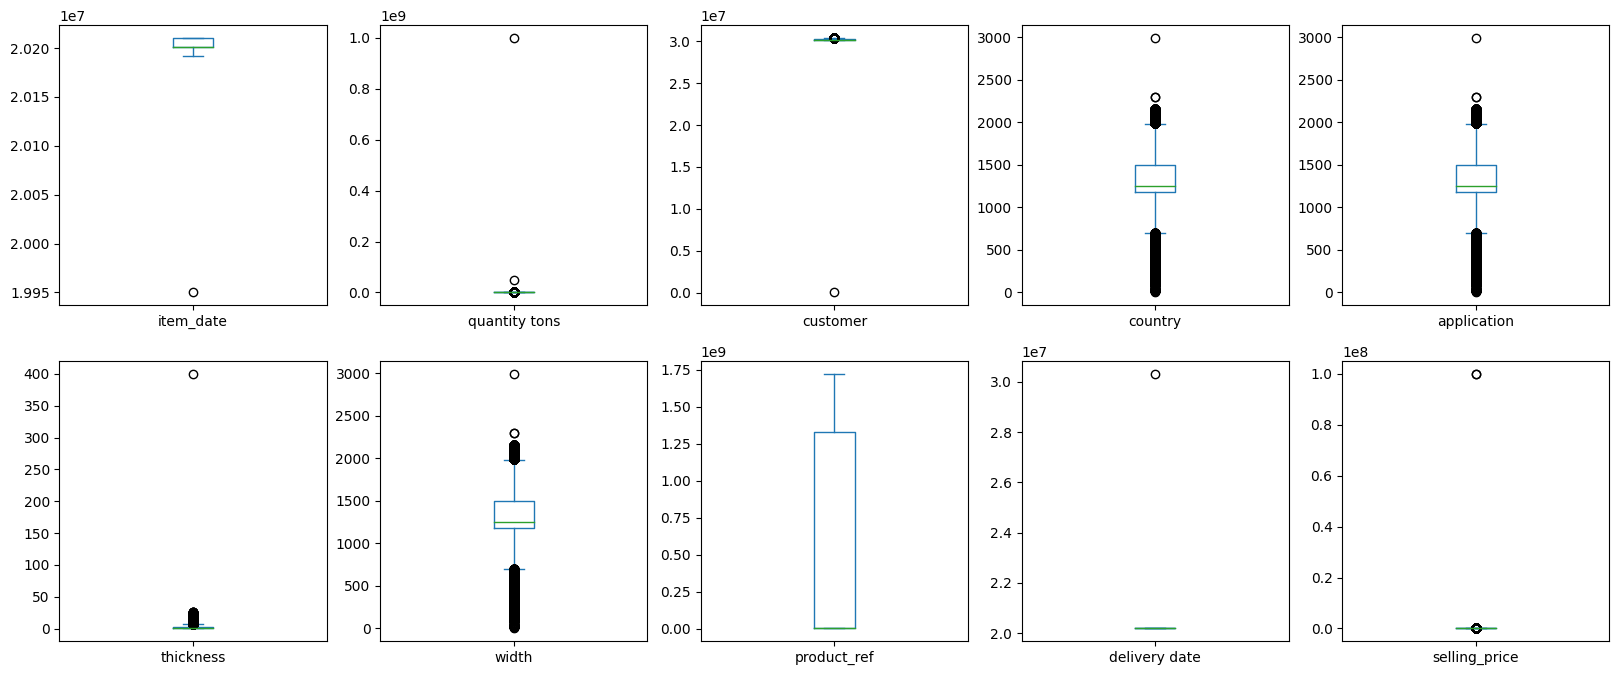

In [22]:
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))

# Outlier and skewness detection

In [23]:
data[['quantity tons','thickness','width','selling_price']].describe()  #stat_anlysis of cont_variables

,quantity tons,thickness,width,selling_price
count,1.816240e+05,181624.000000,181624.000000,1.816240e+05
mean,5.876468e+03,2.550474,1295.270102,1.918467e+03
std,2.349392e+06,2.976495,261.648451,3.318395e+05
min,1.000000e-05,0.180000,1.000000,1.000000e-01
25%,1.096891e+01,0.700000,1180.000000,6.690000e+02
50%,3.036409e+01,1.500000,1250.000000,8.120000e+02
75%,6.716332e+01,3.000000,1500.000000,9.530000e+02
max,1.000000e+09,400.000000,2990.000000,1.000010e+08


In [24]:

def outliers_det(feature_name):
  Iqr = data[feature_name].quantile(0.75) - data[feature_name].quantile(0.25)
  max_threshold = data[feature_name].quantile(0.75) + (1.5 * Iqr)
  min_threshold = data[feature_name].quantile(0.25) - (1.5 * Iqr)
  outliers = data.loc[(data[feature_name] > max_threshold) | (data[feature_name] < min_threshold)]
  no_of_outliers = outliers.shape[0]
  result = (f"No of outliers in {feature_name}: {no_of_outliers}")
  skewness = stats.skew(data[feature_name])
  skew = (f"Skewness:, {skewness}")

  return max_threshold, min_threshold, result,skew


In [25]:
outliers_det('quantity tons') #max , min threshold and no_of_outliers and skewness of  quantity

(151.4549314725,
 -73.32269752749998,
 'No of outliers in quantity tons: 20949',
 'Skewness:, 424.63003278882263')

In [26]:
outliers_det('thickness') #max , min threshold and no_of_outliers of thickness

(6.449999999999999,
 -2.75,
 'No of outliers in thickness: 13946',
 'Skewness:, 15.302836183734758')

In [27]:
outliers_det('width') #max , min threshold and no_of_outliers of thickness

(1980.0,
 700.0,
 'No of outliers in width: 10948',
 'Skewness:, 0.37480609383598484')

In [28]:
outliers_det('selling_price') #max , min threshold and no_of_outliers of thickness

(1379.0,
 243.0,
 'No of outliers in selling_price: 4850',
 'Skewness:, 301.34495177276455')

# Transforming the dataset (skew reduction)

In [29]:
#removing the negative values as it makes no sense in  selling price and quantity for log transformation
import numpy as np
negative = data['selling_price'] <= 0
print(negative.sum())
data.loc[negative, 'selling_price'] = np.nan

neg_tons = data['quantity tons'] <= 0
print(neg_tons.sum())
data.loc[neg_tons, 'quantity tons'] = np.nan
neg_thick = data['thickness'] < 0
print(neg_thick.sum())


0
0
0


In [30]:

def transformation(feature_name,inplace=True):
  data[feature_name] = np.log(data[feature_name])
  Iqr = data[feature_name].quantile(0.75) - data[feature_name].quantile(0.25)
  max_threshold = data[feature_name].quantile(0.75) + (1.5 * Iqr)
  min_threshold = data[feature_name].quantile(0.25) - (1.5 * Iqr)
  outliers = data.loc[(data[feature_name] > max_threshold) | (data[feature_name] < min_threshold)]
  no_of_outliers = outliers.shape[0]
  result = (f"No of outliers in {feature_name}: {no_of_outliers}")
  skewness = stats.skew(data[feature_name])
  skew = (f"Skewness:, {skewness}")

  return max_threshold, min_threshold, result,skew

In [31]:
transformation('thickness')

(3.281543137578373,
 -2.5396057928489957,
 'No of outliers in thickness: 1',
 'Skewness:, 0.3491370012505798')

In [32]:
transformation('quantity tons')

(6.925220365408438,
 -0.3230278791121437,
 'No of outliers in quantity tons: 3661',
 'Skewness:, -0.06877176906425567')

In [33]:
data['quantity tons']= data['quantity tons'].clip(-0.33,6.87)

In [34]:
outliers = data.loc[(data['quantity tons'] > 6.87) | (data['quantity tons'] < -0.33)]
print('no.of.outliers:',outliers.shape[0])
skewness = stats.skew(data['quantity tons'])
print('skewness after clipping:',skewness)


no.of.outliers: 0
skewness after clipping: -0.03556392149811683


In [35]:
transformation('selling_price')

(7.390361168943161,
 5.9750377948392694,
 'No of outliers in selling_price: 3420',
 'Skewness:, -5.34278419267505')

In [36]:
data['selling_price']= data['selling_price'].clip(5.98,7.38)

In [37]:
outliers = data.loc[(data['selling_price'] > 7.38) | (data['selling_price'] < 5.98)]
print('no.of.outliers:',outliers.shape[0])
skewness = stats.skew(data['selling_price'])
print('skewness after clipping:',skewness)


no.of.outliers: 0
skewness after clipping: -0.26695780620079895


In [38]:
transformation('width')

(7.673146391536188,
 6.713343713013823,
 'No of outliers in width: 3949',
 'Skewness:, -3.288197750497977')

In [39]:
data['width']= data['width'].clip(7.673,6.712)

In [40]:
outliers = data.loc[(data['width'] > 7.673) | (data['width'] < 6.712)]
print('no.of.outliers:',outliers.shape[0])
skewness = stats.skew(data['width'])
print('skewness after clipping:',skewness)


no.of.outliers: 0
skewness after clipping: 0.15584607890548993


item_date           Axes(0.125,0.53;0.133621x0.35)
quantity tons    Axes(0.285345,0.53;0.133621x0.35)
customer          Axes(0.44569,0.53;0.133621x0.35)
country          Axes(0.606034,0.53;0.133621x0.35)
application      Axes(0.766379,0.53;0.133621x0.35)
thickness           Axes(0.125,0.11;0.133621x0.35)
width            Axes(0.285345,0.11;0.133621x0.35)
product_ref       Axes(0.44569,0.11;0.133621x0.35)
delivery date    Axes(0.606034,0.11;0.133621x0.35)
selling_price    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

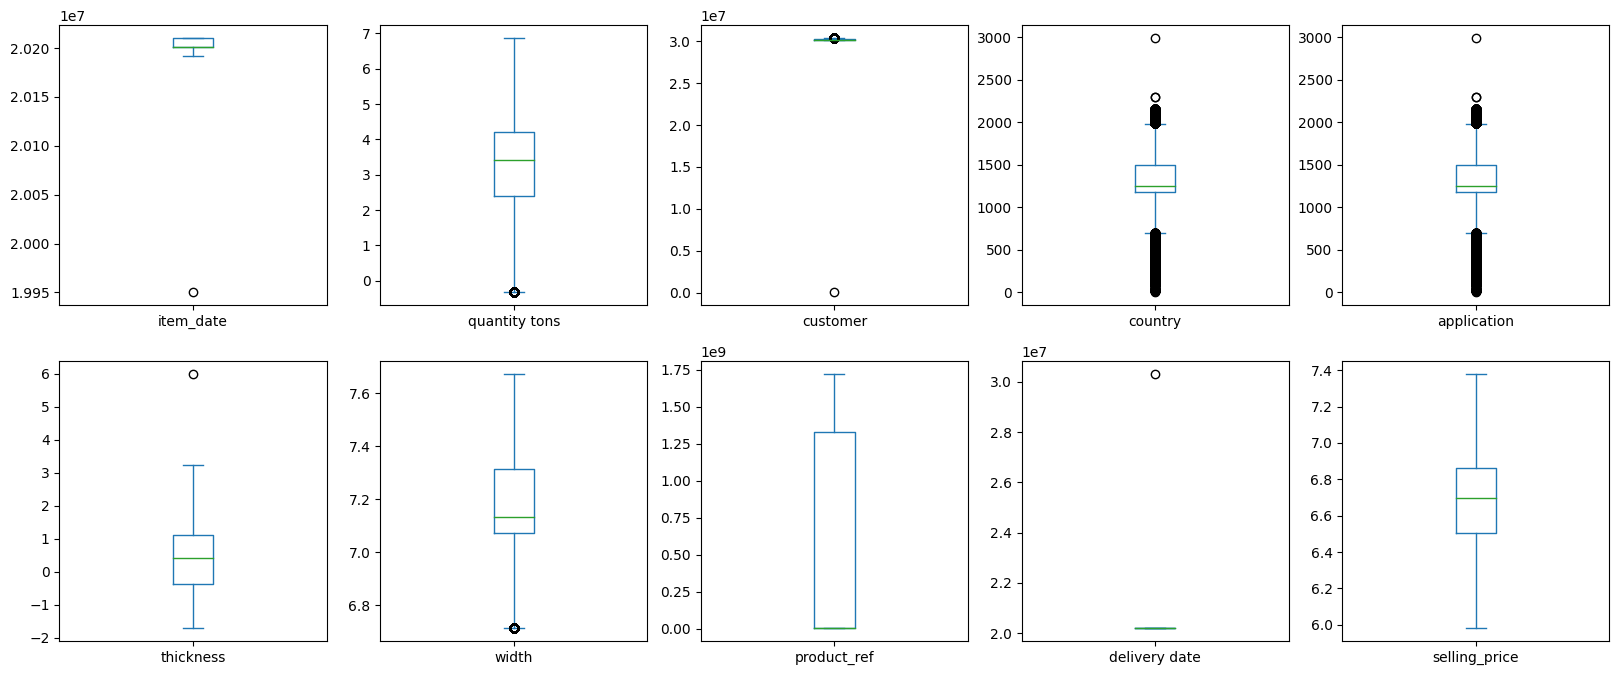

In [41]:
# box plot after transforming and clipping the outliers
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))

C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


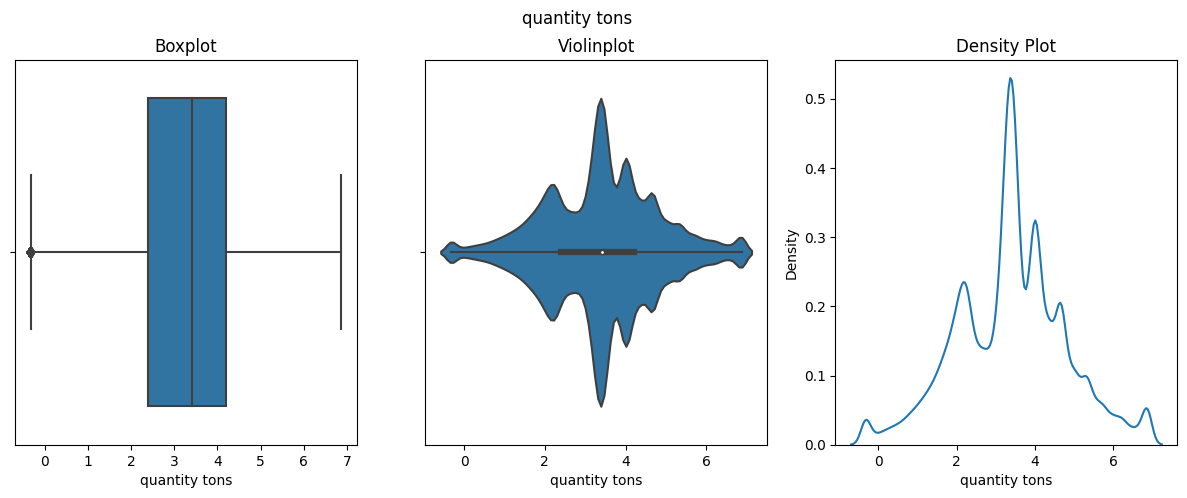

C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


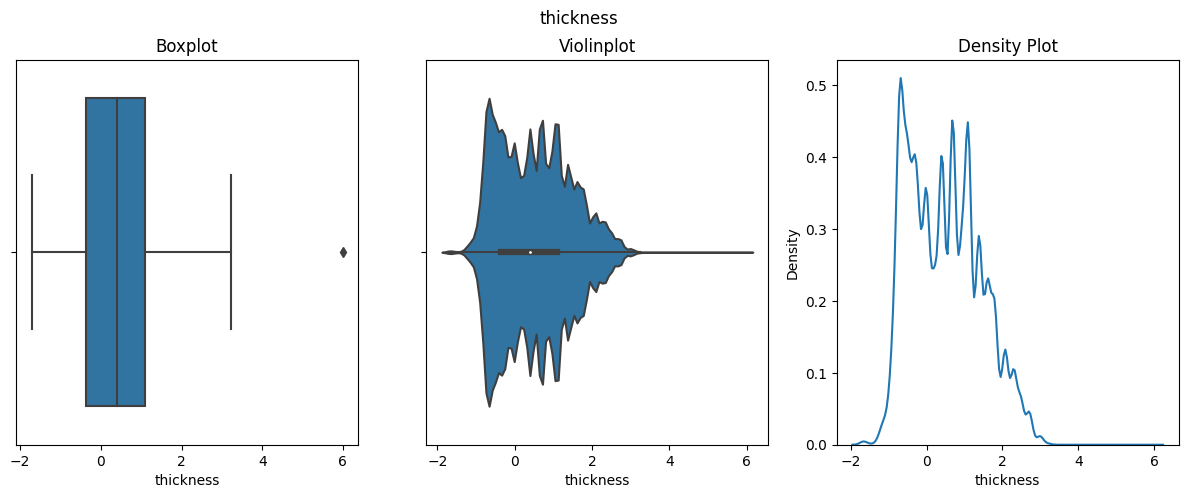

C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


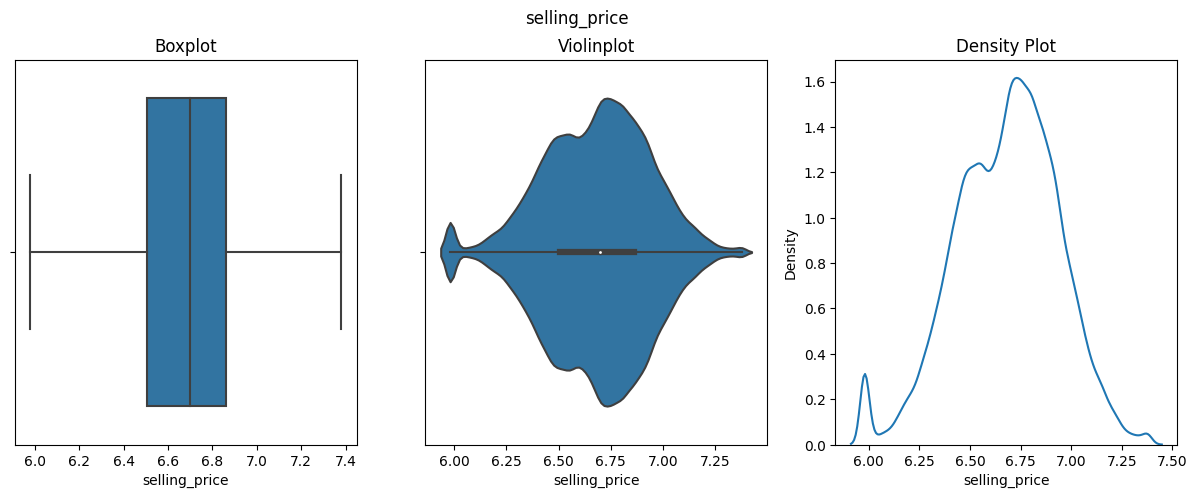

C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


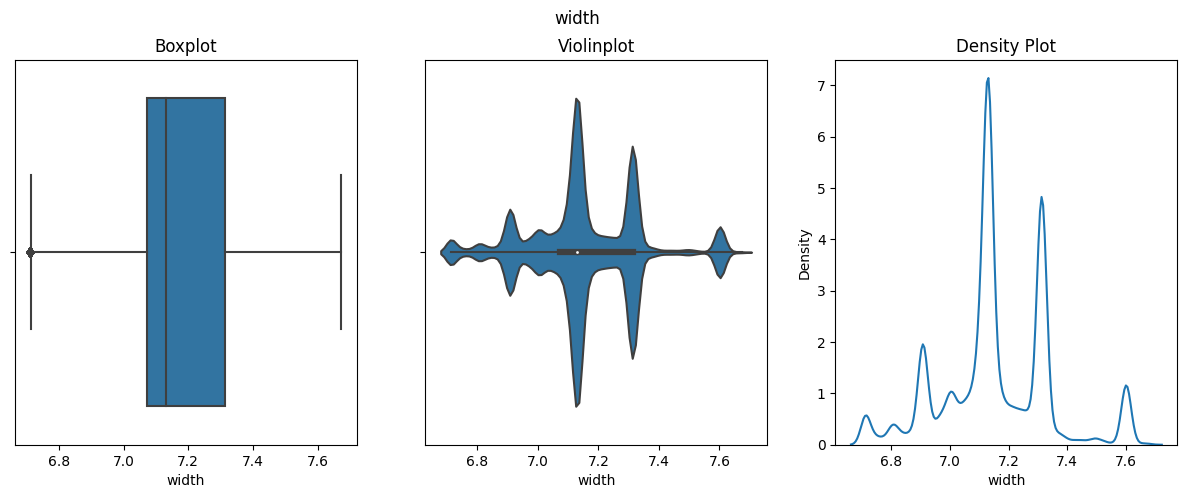

In [47]:
import warnings
columns = ['quantity tons', 'thickness', 'selling_price', 'width']

for col in columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # Boxplot
    sns.boxplot(x=data[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # Violinplot
    sns.violinplot(x=data[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # Density Plot
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.kdeplot(data[col], ax=ax[2])
    
    ax[2].set_title('Density Plot')

    plt.show()


In [48]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,3.991779,30156308.0,1500.0,Won,W,1500.0,0.693147,7.313220,DEQ1 S460MC,1670798778,20210701.0,6.749931
1,20210401.0,6.643822,30202938.0,1210.0,Won,W,1210.0,-0.223144,7.098376,104991,1668701718,20210401.0,6.953684
2,20210401.0,5.956169,30153963.0,952.0,Won,WI,952.0,-0.967584,6.858565,S0380700,628377,20210101.0,6.468211
3,20210401.0,5.310301,30349574.0,1317.0,Won,S,1317.0,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,6.643790
4,20210401.0,6.666354,30211560.0,2000.0,Won,W,2000.0,1.386294,7.600902,2_S275JR+AR-CL1,640665,20210301.0,6.357842


# Feature engineering

<Axes: >

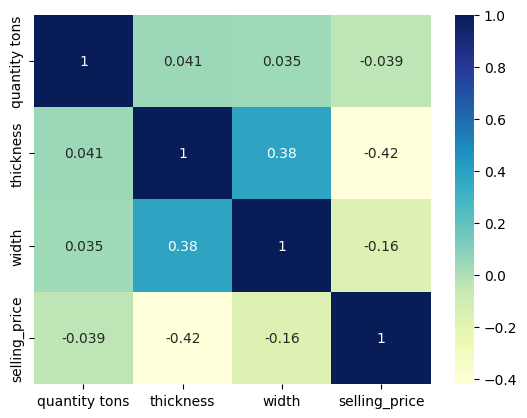

In [49]:
heat = data[['quantity tons','thickness','width','selling_price']].corr()
sns.heatmap(heat, annot=True, cmap="YlGnBu")

# encoding cat_variables

In [50]:
misleading = data.loc[~data.status.isin(['Won','Lost']),:] #datas not having the values aS either true or false in adult column
#these 3 datas are completely corrupted
print(len(misleading)/(data.shape[0])) #there are total 31220 values ie 0.17% of total dataset that does not belongs to either won or lost,we can remove it

0.17175042945866184


In [51]:
data = data.drop(misleading.index)

In [52]:
# Encoding the 'status' column
data['status'] = data['status'].map({'Won': 1, 'Lost': 0})


In [53]:
#encoding the 'item_type' column
# One-Hot Encoding
encoded_data = pd.get_dummies(data['item type'], prefix='item_type')
data = pd.concat([data,encoded_data],axis = 1)
data=data.drop(['item type'],axis =1)




In [54]:
data.shape

(150430, 19)

In [55]:
data

,item_date,quantity tons,customer,country,status,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,20210401.0,3.991779,30156308.0,1500.0,1,1500.0,0.693147,7.313220,DEQ1 S460MC,1670798778,20210701.0,6.749931,False,False,False,False,False,True,False
1,20210401.0,6.643822,30202938.0,1210.0,1,1210.0,-0.223144,7.098376,104991,1668701718,20210401.0,6.953684,False,False,False,False,False,True,False
2,20210401.0,5.956169,30153963.0,952.0,1,952.0,-0.967584,6.858565,S0380700,628377,20210101.0,6.468211,False,False,False,False,False,False,True
3,20210401.0,5.310301,30349574.0,1317.0,1,1317.0,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,6.643790,False,False,False,True,False,False,False
4,20210401.0,6.666354,30211560.0,2000.0,1,2000.0,1.386294,7.600902,2_S275JR+AR-CL1,640665,20210301.0,6.357842,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,4.670802,30200854.0,1240.0,1,1240.0,-0.040822,7.122867,1000222,164141591,20200701.0,6.400257,False,False,False,False,False,True,False
181668,20200702.0,4.629691,30200854.0,1220.0,1,1220.0,-0.040822,7.106606,1000777,164141591,20200701.0,6.381816,False,False,False,False,False,True,False
181669,20200702.0,5.337954,30200854.0,1500.0,1,1500.0,-0.051293,7.313220,1000227,164141591,20200701.0,6.378426,False,False,False,False,False,True,False
181670,20200702.0,1.443523,30200854.0,1250.0,1,1250.0,-0.342490,7.130899,1004216,164141591,20200701.0,6.428105,False,False,False,False,False,True,False


In [56]:
reg_data = data.copy()
class_data = data.copy()

# Decision_tree_Regression

In [57]:
X = reg_data.drop(['selling_price','material_ref'], axis=1)
Y = reg_data['selling_price']


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler ## standrard scaling
scaler = StandardScaler() #initialise to a variable
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Decision Tree regressor
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = regressor.predict(X_test)

# Make predictions on the training set
y_train_pred = regressor.predict(X_train)

# Evaluate the train model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the test model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Train_Mean Squared Error:", mse_train)
print("Train_R-squared:", r2_train)
print("Test_Mean Squared Error:", mse)
print("Test_R-squared:", r2)



Train_Mean Squared Error: 4.486429078102274e-06
Train_R-squared: 0.9999213234026753
Test_Mean Squared Error: 0.004520614782729569
Test_R-squared: 0.9206314631604801


In [63]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values to explore
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree regressor
regressor = DecisionTreeRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Model Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 0.003835653555632172
R-squared: 0.9326573430461573


In [64]:
X_combined = data.drop(['selling_price','material_ref'], axis=1)
y_combined = data['selling_price']


In [65]:
#finalizing the best fit hyper parameters to fit the model
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor with the best hyperparameters
best_regressor = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10)

# Train the model on the combined training and validation data
best_regressor.fit(X_combined, y_combined)


DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

# prediction for new datas based on reg model

In [66]:
pred = best_regressor.predict(scaler.transform(np.array([[20250504.0,np.log(400),30156308.0,30.0,1,41.0,np.log(2.30),np.log(1250),1668701718,20250806.0,0,1,0,0,0,0,0]])))
print(np.exp(pred))

[843.85693917]


C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [67]:
# Saving the model
import pickle
with open('best_regmodel.pkl', 'wb') as file:
    pickle.dump(best_regressor, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# regression tree - classification model

In [68]:
X_d = class_data.drop(['status','material_ref'],axis =1)
Y_d = class_data['status']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_d, Y_d, test_size=0.2, random_state = 42)

In [70]:
data.head()

,item_date,quantity tons,customer,country,status,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,20210401.0,3.991779,30156308.0,1500.0,1,1500.0,0.693147,7.313220,DEQ1 S460MC,1670798778,20210701.0,6.749931,False,False,False,False,False,True,False
1,20210401.0,6.643822,30202938.0,1210.0,1,1210.0,-0.223144,7.098376,104991,1668701718,20210401.0,6.953684,False,False,False,False,False,True,False
2,20210401.0,5.956169,30153963.0,952.0,1,952.0,-0.967584,6.858565,S0380700,628377,20210101.0,6.468211,False,False,False,False,False,False,True
3,20210401.0,5.310301,30349574.0,1317.0,1,1317.0,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,6.643790,False,False,False,True,False,False,False
4,20210401.0,6.666354,30211560.0,2000.0,1,2000.0,1.386294,7.600902,2_S275JR+AR-CL1,640665,20210301.0,6.357842,False,False,False,False,False,True,False


In [71]:
c_scaler = StandardScaler()
c_scaler.fit(X_train)
X_train = c_scaler.transform(X_train)
X_test = c_scaler.transform(X_test)


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict_proba(X_test)
y_pred
#print(y_pred[0:5])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [73]:
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score, roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))
acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)


Test set accuracy: 0.94
Test set f1-score: 0.96
Train set AUC :  1.0


there can be overfitting possibility since auc score is 1.0

In [74]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,23,25,27,30,33]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))




Depth  :  1  Training Accuracy :  0.7722030180150236  Cross val score :  0.7722030192946601
Depth  :  2  Training Accuracy :  0.7722030180150236  Cross val score :  0.7722944269729051
Depth  :  3  Training Accuracy :  0.7736738017682643  Cross val score :  0.7740145684720048
Depth  :  4  Training Accuracy :  0.7888469720135611  Cross val score :  0.7871269389823972
Depth  :  5  Training Accuracy :  0.7925197766402978  Cross val score :  0.7930683172363251
Depth  :  6  Training Accuracy :  0.8094047065080103  Cross val score :  0.808773264560825
Depth  :  7  Training Accuracy :  0.8165591969686897  Cross val score :  0.815653494299043
Depth  :  8  Training Accuracy :  0.8332779365817988  Cross val score :  0.83026159367459
Depth  :  9  Training Accuracy :  0.847370870172173  Cross val score :  0.8421442576596612
Depth  :  10  Training Accuracy :  0.8624360167519777  Cross val score :  0.8548328517200158
Depth  :  20  Training Accuracy :  0.9875855879811208  Cross val score :  0.93423024

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7018
           1       0.96      0.96      0.96     23068

    accuracy                           0.94     30086
   macro avg       0.92      0.92      0.92     30086
weighted avg       0.94      0.94      0.94     30086



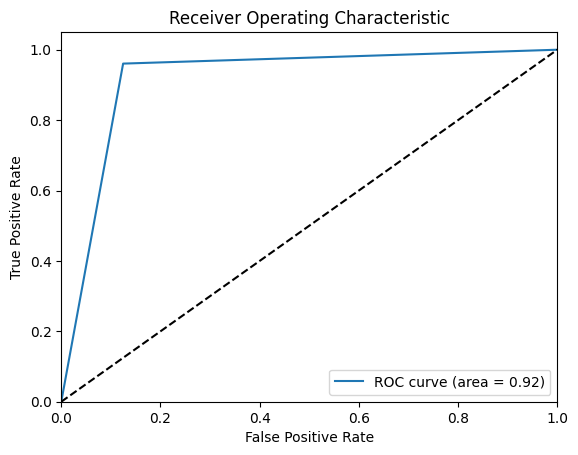

In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  classification_report, roc_curve, auc
# Convert labels to numeric format
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [76]:
#model
best_class = DecisionTreeClassifier(max_depth= 20)
best_class.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20)

In [77]:
best_class.predict(scaler.transform(np.array([[20250504.0,np.log(250),30156308.0,30.0,41.0,np.log(2.30),np.log(1550),1668701718,20251006.0,np.log(1500.50),0,0,0,0,1,0,0]])))

C:\Users\Aravindh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [78]:
import pickle
with open('class_model.pkl', 'wb') as file:
    pickle.dump(best_class, file)
with open('c_scaler.pkl', 'wb') as f:
    pickle.dump(c_scaler, f)